In [1]:
import numpy as np
import pandas as pd
from Bio import SeqIO
from Bio.Seq import reverse_complement
import matplotlib.pyplot as plt
import seaborn as sns

## Pull in annovar text files

In [2]:
import pandas as pd


multianno = pd.read_csv('../data/10847101.hg38_multianno.txt', sep='\t')
multianno

,Chr,Start,End,Ref,Alt,SIFT_score,SIFT_converted_rankscore,SIFT_pred,SIFT4G_score,SIFT4G_converted_rankscore,...,Otherinfo4,Otherinfo5,Otherinfo6,Otherinfo7,Otherinfo8,Otherinfo9,Otherinfo10,Otherinfo11,Otherinfo12,Otherinfo13
0,chr1,13302,13302,C,T,.,.,.,.,.,...,chr1,13302,.,C,T,37.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:49,6,0"
1,chr1,13325,13325,-,ACTT,.,.,.,.,.,...,chr1,13325,.,C,CACTT,78.28,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:90,6,0"
2,chr1,817341,817341,A,G,.,.,.,.,.,...,chr1,817341,.,A,G,323.06,.,AC=2;AF=1.00;AN=2;DP=12;ExcessHet=0.0000;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,11:11:33:337,33,0"
3,chr1,817514,817514,T,C,.,.,.,.,.,...,chr1,817514,.,T,C,70.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:82,6,0"
4,chr1,820049,820049,-,ACT,.,.,.,.,.,...,chr1,820049,.,C,CACT,78.28,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:90,6,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802433,chr6_GL000255v2_alt,3464957,3464957,C,A,.,.,.,.,.,...,chr6_GL000255v2_alt,3464957,.,C,A,78.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:90,6,0"
802434,chr19_GL949752v1_alt,879523,879523,T,C,.,.,.,.,.,...,chr19_GL949752v1_alt,879523,.,T,C,37.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.674;DP=4;Ex...,GT:AD:DP:GQ:PL,"0/1:2,2:4:45:45,0,56"
802435,chr19_GL949752v1_alt,901035,901035,C,T,.,.,.,.,.,...,chr19_GL949752v1_alt,901035,.,C,T,37.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:49,6,0"
802436,chr19_GL949753v2_alt,383709,383709,C,T,.,.,.,.,.,...,chr19_GL949753v2_alt,383709,.,C,T,37.32,.,AC=2;AF=1.00;AN=2;DP=2;ExcessHet=0.0000;FS=0.0...,GT:AD:DP:GQ:PL,"1/1:0,2:2:6:49,6,0"


In [8]:
rename_clinvars = {'CHROM': 'Chr',
                   'POS': 'Start',
                   'REF': 'Ref',
                   'ALT': 'Alt'}

manual_clinvar = pd.read_csv('10847101.hg38_clinvar_manual_merge.csv', index_col=0).rename(columns=rename_clinvars)
manual_clinvar['Alt'] = manual_clinvar['Alt'].map(lambda x: x.strip("'[]'") if x else None)
manual_clinvar

,Chr,Start,Ref,Alt,READ DEPTH,AF,ID,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNVC,CLNVCSO,GENEINFO,MC,ORIGIN
0,chr1,976215,A,G,37,[0.5],1320032,1310278,"['Human_Phenotype_Ontology:HP:0032647', 'MedGe...",['Renal_tubular_epithelial_cell_apoptosis|Neut...,['NC_000001.11:g.976215A>G'],['no_assertion_criteria_provided'],['Pathogenic'],single_nucleotide_variant,SO:0001483,PERM1:84808,['SO:0001583|missense_variant'],['0']
1,chr1,1013466,T,TA,10,[1.0],1185392,1175249,"['MONDO:MONDO:0014502', 'MedGen:C4015293', 'OM...",['Mendelian_susceptibility_to_mycobacterial_di...,['NC_000001.11:g.1013467dup'],"['criteria_provided', '_multiple_submitters', ...",['Benign'],Duplication,SO:1000035,ISG15:9636,NaN,['1']
2,chr1,1013490,C,G,10,[1.0],1185393,1175250,"['MONDO:MONDO:0014502', 'MedGen:C4015293', 'OM...",['Mendelian_susceptibility_to_mycobacterial_di...,['NC_000001.11:g.1013490C>G'],"['criteria_provided', '_multiple_submitters', ...",['Benign'],single_nucleotide_variant,SO:0001483,ISG15:9636,NaN,['1']
3,chr1,1013541,T,C,9,[1.0],1185394,1175251,"['MONDO:MONDO:0014502', 'MedGen:C4015293', 'OM...",['Mendelian_susceptibility_to_mycobacterial_di...,['NC_000001.11:g.1013541T>C'],"['criteria_provided', '_multiple_submitters', ...",['Benign'],single_nucleotide_variant,SO:0001483,ISG15:9636,['SO:0001623|5_prime_UTR_variant'],['1']
4,chr1,1013855,G,A,12,[1.0],1185395,1175252,"['MONDO:MONDO:0014502', 'MedGen:C4015293', 'OM...",['Mendelian_susceptibility_to_mycobacterial_di...,['NC_000001.11:g.1013855G>A'],"['criteria_provided', '_single_submitter']",['Benign'],single_nucleotide_variant,SO:0001483,ISG15:9636,['SO:0001627|intron_variant'],['1']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24853,chrX,154652556,C,A,28,[1.0],770031,706177,['MedGen:CN517202'],['not_provided'],['NC_000023.11:g.154652556C>A'],"['criteria_provided', '_single_submitter']",['Benign'],single_nucleotide_variant,SO:0001483,CTAG2:30848,['SO:0001819|synonymous_variant'],['1']
24854,chrX,154653251,C,G,19,[1.0],770030,706179,['MedGen:CN517202'],['not_provided'],['NC_000023.11:g.154653251C>G'],"['criteria_provided', '_single_submitter']",['Benign'],single_nucleotide_variant,SO:0001483,CTAG2:30848,['SO:0001583|missense_variant'],['1']
24855,chrX,154763183,C,T,3,[1.0],1295610,1285405,['MedGen:CN517202'],['not_provided'],['NC_000023.11:g.154763183C>T'],"['criteria_provided', '_single_submitter']",['Benign'],single_nucleotide_variant,SO:0001483,DKC1:1736,['SO:0001627|intron_variant'],['1']
24856,chrX,154766321,G,T,26,[1.0],166994,177673,"['MedGen:CN169374|MONDO:MONDO:0015780', 'MedGe...",['not_specified|Dyskeratosis_congenita|Dyskera...,['NC_000023.11:g.154766321G>T'],"['criteria_provided', '_multiple_submitters', ...",['Benign/Likely_benign'],single_nucleotide_variant,SO:0001483,DKC1:1736,"['SO:0001619|non-coding_transcript_variant', '...",['1']


In [9]:
import re
pd.options.display.max_columns = 300
# proposed column names
column_names = [
    'Gene_Description',
    'Variant_Type',
    'Functional_Description',
    'Chr',
    'Start',
    'End',
    'Ref',
    'Alt',
    'Allele_Frequency',
    'Quality',
    'Depth',
    'Reference_Chromosome',
    'Reference_Position',
    'ID',
    'Reference_Allele',
    'Alternative_Allele',
    'Variant_Quality',
    'Filter_Status',
    'Info',
    'Format',
    'Sample_Data'
]

ref_gene = pd.read_csv('../data/10847101.refGene.exonic_variant_function', sep='\t')
ref_gene.columns = column_names

# depth alread included
# ref_gene['Depth'] = ref_gene.Info.map(lambda x: re.search("(?<=DP=)\d+", x).group())
ref_gene

,Gene_Description,Variant_Type,Functional_Description,Chr,Start,End,Ref,Alt,Allele_Frequency,Quality,Depth,Reference_Chromosome,Reference_Position,ID,Reference_Allele,Alternative_Allele,Variant_Quality,Filter_Status,Info,Format,Sample_Data
0,line62,synonymous SNV,"NOC2L:NM_015658:exon16:c.C1843T:p.L615L,",chr1,946247,946247,G,A,0.5,487.64,43,chr1,946247,.,G,A,487.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.126;DP=43;E...,GT:AD:DP:GQ:PL,"0/1:19,24:43:99:495,0,374"
1,line72,synonymous SNV,"NOC2L:NM_015658:exon10:c.T1182C:p.T394T,",chr1,952421,952421,A,G,1.0,587.06,23,chr1,952421,.,A,G,587.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=1.130;DP=24;Exc...,GT:AD:DP:GQ:PL,"1/1:2,21:23:33:601,33,0"
2,line74,synonymous SNV,"NOC2L:NM_015658:exon9:c.A918G:p.E306E,",chr1,953259,953259,T,C,1.0,1137.06,41,chr1,953259,.,T,C,1137.06,.,AC=2;AF=1.00;AN=2;DP=41;ExcessHet=0.0000;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,41:41:99:1151,122,0"
3,line75,nonsynonymous SNV,"NOC2L:NM_015658:exon9:c.A898G:p.I300V,",chr1,953279,953279,T,C,1.0,1181.06,45,chr1,953279,.,T,C,1181.06,.,AC=2;AF=1.00;AN=2;DP=45;ExcessHet=0.0000;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,45:45:99:1195,133,0"
4,line82,nonframeshift deletion,"NOC2L:NM_015658:exon3:c.306_308del:p.S103del,",chr1,957145,957147,GAG,-,0.5,34.60,16,chr1,957144,.,AGAG,A,34.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.586;DP=16;E...,GT:AD:DP:GQ:PL,"0/1:14,2:16:42:42,0,565"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56624,line802395,frameshift deletion,"HLA-DPB1:NM_002121:exon5:c.766delG:p.G256Dfs*8,",chr6_GL000251v2_alt,4498013,4498013,G,-,0.5,64.60,6,chr6_GL000251v2_alt,4498012,.,AG,A,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.431;DP=6;Ex...,GT:AD:DP:GQ:PL,"0/1:4,2:6:72:72,0,162"
56625,line802396,frameshift deletion,HLA-DPB1:NM_002121:exon5:c.769_772del:p.S257Hf...,chr6_GL000251v2_alt,4498016,4498019,TCTG,-,0.5,64.60,6,chr6_GL000251v2_alt,4498015,.,ATCTG,A,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.431;DP=6;Ex...,GT:AD:DP:GQ:PL,"0/1:4,2:6:72:72,0,162"
56626,line802411,synonymous SNV,"KRTAP5-5:NM_001001480:exon4:c.A558G:p.S186S,",chr11_KI270903v1_alt,107146,107146,A,G,0.5,64.64,6,chr11_KI270903v1_alt,107146,.,A,G,64.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.431;DP=6;Exc...,GT:AD:DP:GQ:PL,"0/1:4,2:6:72:72,0,162"
56627,line802412,frameshift insertion,KRTAP5-5:NM_001001480:exon4:c.573_574insACAT:p...,chr11_KI270903v1_alt,107161,107161,-,ACAT,0.5,64.60,6,chr11_KI270903v1_alt,107161,.,C,CACAT,64.60,.,AC=1;AF=0.500;AN=2;BaseQRankSum=0.431;DP=6;Exc...,GT:AD:DP:GQ:PL,"0/1:4,2:6:72:72,0,162"


In [13]:
# Merge predicted pathogeneitc with info related to exon/gene data from refGene analysis.
df = multianno.merge(ref_gene, 
                     how='right', 
                     on=['Chr',
                         'Start',
                         'End',
                         'Ref',
                         'Alt' ]).merge(manual_clinvar, 
                                        how='left', 
                                        on=['Chr',
                                             'Start',
                                             'Ref',
                                             'Alt' ])

df

,Chr,Start,End,Ref,Alt,SIFT_score,SIFT_converted_rankscore,SIFT_pred,SIFT4G_score,SIFT4G_converted_rankscore,SIFT4G_pred,LRT_score,LRT_converted_rankscore,LRT_pred,MutationTaster_score,MutationTaster_converted_rankscore,MutationTaster_pred,MutationAssessor_score,MutationAssessor_rankscore,MutationAssessor_pred,FATHMM_score,FATHMM_converted_rankscore,FATHMM_pred,PROVEAN_score,PROVEAN_converted_rankscore,PROVEAN_pred,MetaSVM_score,MetaSVM_rankscore,MetaSVM_pred,MetaLR_score,MetaLR_rankscore,MetaLR_pred,MetaRNN_score,MetaRNN_rankscore,MetaRNN_pred,M-CAP_score,M-CAP_rankscore,M-CAP_pred,MutPred_score,MutPred_rankscore,MVP_score,MVP_rankscore,MPC_score,MPC_rankscore,PrimateAI_score,PrimateAI_rankscore,PrimateAI_pred,DEOGEN2_score,DEOGEN2_rankscore,DEOGEN2_pred,BayesDel_addAF_score,BayesDel_addAF_rankscore,BayesDel_addAF_pred,BayesDel_noAF_score,BayesDel_noAF_rankscore,BayesDel_noAF_pred,ClinPred_score,ClinPred_rankscore,ClinPred_pred,LIST-S2_score,LIST-S2_rankscore,LIST-S2_pred,Aloft_pred,Aloft_Confidence,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_pred,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,integrated_fitCons_score,integrated_fitCons_rankscore,integrated_confidence_value,GERP++_NR,GERP++_RS,GERP++_RS_rankscore,phyloP100way_vertebrate,phyloP100way_vertebrate_rankscore,phyloP30way_mammalian,phyloP30way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons30way_mammalian,phastCons30way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V8_gene,GTEx_V8_tissue,Otherinfo1,Otherinfo2,Otherinfo3,Otherinfo4,Otherinfo5,Otherinfo6,Otherinfo7,Otherinfo8,Otherinfo9,Otherinfo10,Otherinfo11,Otherinfo12,Otherinfo13,Gene_Description,Variant_Type,Functional_Description,Allele_Frequency,Quality,Depth,Reference_Chromosome,Reference_Position,ID_x,Reference_Allele,Alternative_Allele,Variant_Quality,Filter_Status,Info,Format,Sample_Data,READ DEPTH,AF,ID_y,ALLELEID,CLNDISDB,CLNDN,CLNHGVS,CLNREVSTAT,CLNSIG,CLNVC,CLNVCSO,GENEINFO,MC,ORIGIN
0,chr1,946247,946247,G,A,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,0.5,487.64,43,chr1,946247,.,G,A,487.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.126;DP=43;E...,GT:AD:DP:GQ:PL,"0/1:19,24:43:99:495,0,374",line62,synonymous SNV,"NOC2L:NM_015658:exon16:c.C1843T:p.L615L,",0.5,487.64,43,chr1,946247,.,G,A,487.64,.,AC=1;AF=0.500;AN=2;BaseQRankSum=-0.126;DP=43;E...,GT:AD:DP:GQ:PL,"0/1:19,24:43:99:495,0,374",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,952421,952421,A,G,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,587.06,23,chr1,952421,.,A,G,587.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=1.130;DP=24;Exc...,GT:AD:DP:GQ:PL,"1/1:2,21:23:33:601,33,0",line72,synonymous SNV,"NOC2L:NM_015658:exon10:c.T1182C:p.T394T,",1.0,587.06,23,chr1,952421,.,A,G,587.06,.,AC=2;AF=1.00;AN=2;BaseQRankSum=1.130;DP=24;Exc...,GT:AD:DP:GQ:PL,"1/1:2,21:23:33:601,33,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,953259,953259,T,C,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,1.0,1137.06,41,chr1,953259,.,T,C,1137.06,.,AC=2;AF=1.00;AN=2;DP=41;ExcessHet=0.0000;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,41:41:99:1151,122,0",line74,synonymous SNV,"NOC2L:NM_015658:exon9:c.A918G:p.E306E,",1.0,1137.06,41,chr1,953259,.,T,C,1137.06,.,AC=2;AF=1.00;AN=2;DP=41;ExcessHet=0.0000;FS=0....,GT:AD:DP:GQ:PL,"1/1:0,41:41:99:1151,122,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,953279,953

In [21]:
pd.options.display.max_colwidth = 100
cols = ['Chr', 'Start', 'End', 'Ref', 'Alt', 'Variant_Type', 'Interpro_domain', 'Functional_Description', 'Allele_Frequency', 'Depth', 'CLNDN', 'CLNHGVS', 'CLNSIG']
df[df.Functional_Description.str.contains('DMD')].sort_values(by='Start')[cols]

,Chr,Start,End,Ref,Alt,Variant_Type,Interpro_domain,Functional_Description,Allele_Frequency,Depth,CLNDN,CLNHGVS,CLNSIG
54902,chrX,31147496,31147496,G,A,nonsynonymous SNV,Mff-like domain;.;.;.;.;.;.;.;.;.;Mff-like domain;.;.;.,"DMD:NM_004017:exon13:c.C1333T:p.R445C,DMD:NM_004018:exon13:c.C1333T:p.R445C,DMD:NM_004015:exon14...",1.0,2,['Dystrophin_deficiency|Becker_muscular_dystrophy|Cardiomyopathy|Duchenne_muscular_dystrophy'],['NC_000023.11:g.31147496G>A'],['Uncertain_significance']
54903,chrX,31147498,31147499,TC,-,frameshift deletion,.,"DMD:NM_004017:exon13:c.1330_1331del:p.D444Pfs*9,DMD:NM_004018:exon13:c.1330_1331del:p.D444Pfs*9,...",1.0,2,NaN,NaN,NaN
54904,chrX,31169547,31169547,G,A,synonymous SNV,.,"DMD:NM_004017:exon12:c.C1206T:p.S402S,DMD:NM_004018:exon12:c.C1206T:p.S402S,DMD:NM_004015:exon13...",0.5,14,NaN,NaN,NaN
54905,chrX,31169550,31169550,G,A,synonymous SNV,.,"DMD:NM_004017:exon12:c.C1203T:p.D401D,DMD:NM_004018:exon12:c.C1203T:p.D401D,DMD:NM_004015:exon13...",0.5,14,NaN,NaN,NaN
54906,chrX,31172406,31172406,-,ACAG,stopgain,.,"DMD:NM_004017:exon11:c.1092_1093insCTGT:p.E365Lfs*2,DMD:NM_004018:exon11:c.1092_1093insCTGT:p.E3...",0.5,23,NaN,NaN,NaN
54907,chrX,31182874,31182874,G,C,nonsynonymous SNV,"EF-hand domain, type 2;EF-hand domain, type 2;EF-hand domain, type 2;EF-hand domain, type 2;EF-h...","DMD:NM_004015:exon7:c.C634G:p.L212V,DMD:NM_004016:exon7:c.C634G:p.L212V,DMD:NM_004017:exon7:c.C6...",0.5,13,NaN,NaN,NaN
54908,chrX,31182877,31182882,CCGCTT,-,nonframeshift deletion,.,"DMD:NM_004015:exon7:c.626_631del:p.E209_A210del,DMD:NM_004016:exon7:c.626_631del:p.E209_A210del,...",0.5,13,NaN,NaN,NaN
54909,chrX,31182883,31182883,C,A,stopgain,"EF-hand domain, type 2;EF-hand domain, type 2;EF-hand domain, type 2;EF-hand domain, type 2;EF-h...","DMD:NM_004015:exon7:c.G625T:p.E209X,DMD:NM_004016:exon7:c.G625T:p.E209X,DMD:NM_004017:exon7:c.G6...",0.5,11,['Duchenne_muscular_dystrophy'],['NC_000023.11:g.31182883C>A'],['Pathogenic']
54910,chrX,31478233,31478233,C,T,nonsynonymous SNV,.;.;.;.;.;.;.;.;.;.,"DMD:NM_004014:exon5:c.G623A:p.R208Q,DMD:NM_004013:exon16:c.G1430A:p.R477Q,DMD:NM_004020:exon16:c...",1.0,20,['Cardiomyopathy|Becker_muscular_dystrophy|Duchenne_muscular_dystrophy|Dystrophin_deficiency|not...,['NC_000023.11:g.31478233C>T'],['Benign']
54911,chrX,31875265,31875265,-,AGTT,frameshift insertion,.,"DMD:NM_004011:exon20:c.2997_2998insAACT:p.L1000Nfs*9,DMD:NM_004012:exon20:c.2988_2989insAACT:p.L...",0.5,8,NaN,NaN,NaN


In [ ]:
# These results indicate either a duplication or mosaicism that is highly unlikely as I'm not dead from Duchenne muscular dystrophy or an ambulant individual. I'm additionally probably not developmentaly delayed...
# These result therefore are highly suspect concerning their accuracy.


In [125]:
df.SIFT_score.value_counts()

.        38271
1.0       2351
0.0       1871
0.001      859
0.002      513
         ...  
0.996        1
0.895        1
0.72         1
0.985        1
0.99         1
Name: SIFT_score, Length: 989, dtype: int64

In [126]:

# Based on past casual analysis given by clinical specialist
# reside change to Cys which typically are negative changes
mst1_locs = (49683947, 49689474)
mst1 = df[df.Chr == 'chr3']
mst1 = mst1[(mst1.Start > mst1_locs[0]) &  (mst1.End < mst1_locs[1])]

mst1

,Chr,Start,End,Ref,Alt,SIFT_score,SIFT_converted_rankscore,SIFT_pred,SIFT4G_score,SIFT4G_converted_rankscore,SIFT4G_pred,LRT_score,LRT_converted_rankscore,LRT_pred,MutationTaster_score,MutationTaster_converted_rankscore,MutationTaster_pred,MutationAssessor_score,MutationAssessor_rankscore,MutationAssessor_pred,FATHMM_score,FATHMM_converted_rankscore,FATHMM_pred,PROVEAN_score,PROVEAN_converted_rankscore,PROVEAN_pred,MetaSVM_score,MetaSVM_rankscore,MetaSVM_pred,MetaLR_score,MetaLR_rankscore,MetaLR_pred,MetaRNN_score,MetaRNN_rankscore,MetaRNN_pred,M-CAP_score,M-CAP_rankscore,M-CAP_pred,MutPred_score,MutPred_rankscore,MVP_score,MVP_rankscore,MPC_score,MPC_rankscore,PrimateAI_score,PrimateAI_rankscore,PrimateAI_pred,DEOGEN2_score,DEOGEN2_rankscore,DEOGEN2_pred,BayesDel_addAF_score,BayesDel_addAF_rankscore,BayesDel_addAF_pred,BayesDel_noAF_score,BayesDel_noAF_rankscore,BayesDel_noAF_pred,ClinPred_score,ClinPred_rankscore,ClinPred_pred,LIST-S2_score,LIST-S2_rankscore,LIST-S2_pred,Aloft_pred,Aloft_Confidence,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_pred,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,integrated_fitCons_score,integrated_fitCons_rankscore,integrated_confidence_value,GERP++_NR,GERP++_RS,GERP++_RS_rankscore,phyloP100way_vertebrate,phyloP100way_vertebrate_rankscore,phyloP30way_mammalian,phyloP30way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons30way_mammalian,phastCons30way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V8_gene,GTEx_V8_tissue,Otherinfo1,Otherinfo2,Otherinfo3,Otherinfo4,Otherinfo5,Otherinfo6,Otherinfo7,Otherinfo8,Otherinfo9,Otherinfo10,Otherinfo11,Otherinfo12,Otherinfo13,Gene_Description,Variant_Type,Functional_Description,Allele_Frequency,Quality,Depth,Reference_Chromosome,Reference_Position,ID,Reference_Allele,Alternative_Allele,Variant_Quality,Filter_Status,Info,Format,Sample_Data
10955,chr3,49684099,49684099,G,A,0.02,0.496,D,0.045,0.494,D,0.290,0.148,N,0.998,0.225,P,.,.,.,-2.48,0.891,D,-2.58,0.557,D,-1.025,0.221,T,0.000,0.000,T,0.004,0.001,T,.,.,.,.,.,.,.,0.465,0.459,0.274,0.067,T,.,.,.,-0.361,0.041,T,-0.147,0.595,T,0.025,0.013,T,0.889,0.620,D,.;,.;,0.998,0.863,0.646,0.325,D,0.506,0.537,D,-0.293,0.294,-0.427,0.242,0.672,0.526,0,5.59,-2.82,0.054,1.118,0.309,1.171,0.724,0.550,0.273,0.977,0.468,12.694,0.564,"Serine proteases, trypsin domain|Serine proteases, trypsin domain|Serine proteases, trypsin domain|Serine proteases, trypsin domain",IP6K2|QRICH1|AMT|NICN1|APEH|MST1|RNF123|MST1R|RBM6|DOCK3|AMT|NICN1|APEH|MST1|RNF123|GMPPB|RBM6|SEMA3F|IP6K2|TCTA|AMT|NICN1|APEH|MST1|RNF123|GMPPB|MST1R|AC105935.1|RBM6|SEMA3F|AMT|MST1|RNF123|RBM6|IP6K2|RHOA|AMT|NICN1|MST1|RNF123|GMPPB|IP6K1|CDHR4|UBA7|RBM6|HYAL3|MST1|GPX1|RNF123|RBM6|GPX1|MST1|MST1R|GPX1|RNF123|INKA1|MST1R|RBM6|IP6K2|GPX1|MST1|RNF123|INKA1|RBM6|GPX1|BSN|GMPPB|RBM6|GPX1|MST1|MST1|MST1|GPX1|AMT|MST1|RNF123|RBM6|AMT|NICN1|APEH|MST1|RNF123|GMPPB|RBM6|IP6K2|GPX1|TCTA|AMT|DAG1|APEH|MST1|RNF123|INKA1|UBA7|MST1R|RBM6|IP6K2|RHOA-IT1|AMT|NICN1|MST1|RNF123|CDHR4|RBM6|IP6K2|RHOA-IT1|NICN1|RNF123|UBA7|RBM6|AMT|NICN1|MST1|RNF123|GMPPB|RBM6|WDR6|KLHDC8B|GPX1|AMT|NICN1|DAG1|APEH|MST1|RNF123|INKA1|UBA7|RBM6|IP6K2|AMT|NICN1|APEH|MST1|RNF123|GMPPB|MST1R|RBM6|NICN1|DAG1|MST1|RNF123|MST1R|...,Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Subcutaneous|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Adipose_Visceral_Omentum|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_Aorta|Artery_

In [160]:
from Bio import SeqIO
from tqdm import tqdm

# retrieve chromosome lengths
chrom_lens = {}

for rec in tqdm(SeqIO.parse('../data/GCA_000001405.15_GRCh38_full_analysis_set.fna', 'fasta')):
    chrom_lens[rec.id] = len(rec.seq)
    
for rec in SeqIO.parse('../data/GCA_000001405.15_GRCh38_full_analysis_set.fna', 'fasta'):
    if rec.id == 'chr3':
        break
        



456it [00:18, 25.17it/s] 


In [162]:
# apply lengths
df['Chr_len'] = df['Chr'].map(chrom_lens)


In [87]:
# Slice out locus to run through Expasy translate

mst1_locus = rec.seq[mst1_locs[0]: mst1_locs[1]].__str__()

mst1_locus

'ACAGGCATAAAGAGGAAACATGGCTTTATGTCTGACAAGAAGTTTTGTCCTCCCCAAGGCATATGGCATCAAGGCTGGGCCTAACCCAGTCTCATGACCTTGTGAATCCAGTCCACAAACACAGAGACACGCGTGAAGACAGCTGGCCAGCGGGACCTTGCGCATACTCGGTTGGGGATTATAATTCCTTCCAGGACCCAGCAGTTGTGGGTAAAGCAGGCAAGTGGGCCCCCGTAGTCACCCTGGCAGGTAGGAGAACTGATGAGGGCCCCGGGCCACAGCAATGACTAGCCTGCTTCATGATAAAATAGTTCATTTCTAGCCCCCCATACCCTTCCAGGGCTGGCCCAGGGCCCTGCCACCAACCTCACAGGCCCCCACAGGGGCCAACAGTCCCTCAGTGCACATCTCACTCTCCCGCACACGTCCTCGGTGCTTGATGTTACACTCCTGGTTGGAGATGACATTCAGCAAGGCCACATTTAGGACTGTGTCATTACCCGTACCTGCAGTGAGGGGAATGGGGAGAGGGAGAGGGTCCTGCAGGAAGATCCAGGGCTGGGCCTCCTGGCCACCAGCAGTCCTGTGCACTGTGCTCTTACCTTTGGTCTCACCCCAGCCTGCAATCTCACACTTGGTCCCTGGAGGCACCACATACCATTCAGGGGGCAGGCAGATCAGGGCCACACGCTGGTTCAGGGTCACAGATCTTTAGCAAGAATGGGGGCACTCAGGGTCTGAGGCCACAAGGCCCAGCCCCACCTCACACCCTCCCAGGTTGTCCACATACCTCTCCAGCTTGAGCAGGACAAGCTGGGAGCCTGAGGGCCCACACACCATCTTGGCTACTGGGACCCGCTGTAGGCTTGGCTCTCCATGCTGTGGGTTCTGGAACAGGGTGCCCAACCATACCTCATAGCCCGTGAGAGGCATATGGCTGGGAGAGAAGCTCTGCTAGGTCATTTGTGACTCTCAGTCCATTGCCCCAAGGCTCACTTG

In [100]:
from Bio.Seq import reverse_complement
snp_exon = "GGTGACTACGGGGGCCCACTTGCCTGCTTTACCCACAACTGCTGGGTCCTGGAAGGAATTATAATCCCCAACCGAGTATGCGCAAGGTCCCGCTGGCCAGCTGTCTTCACGCGTGTCTCTGTGTTTGTGGACTGGATTCACAAGGTCATGAGACTGGGTTAGGCCCAGCCTTGATGCCATATGCCTTGGGGAGGACAAAACTTCTTGTCAGACATAAAGCCATGTTTCCTCTTTATGCCTGTA"
snp_exon = reverse_complement(snp_exon)
print(snp_exon)
print(mst1_locs)

TACAGGCATAAAGAGGAAACATGGCTTTATGTCTGACAAGAAGTTTTGTCCTCCCCAAGGCATATGGCATCAAGGCTGGGCCTAACCCAGTCTCATGACCTTGTGAATCCAGTCCACAAACACAGAGACACGCGTGAAGACAGCTGGCCAGCGGGACCTTGCGCATACTCGGTTGGGGATTATAATTCCTTCCAGGACCCAGCAGTTGTGGGTAAAGCAGGCAAGTGGGCCCCCGTAGTCACC
(49683947, 49689474)


In [99]:
snp_pos = 49684099

adj_snp_pos = snp_pos - mst1_locs[0]

mst1_locus[adj_snp_pos -5: adj_snp_pos + 5]

'CAGCGGGACC'

In [252]:
pd.options.display.max_colwidth = 800

df1 = df.copy().replace('.', np.NaN)

#df1 = df1[df1.SIFT_score.isna() == False]

# sort by SIFT first
df1 = df1[df1.SIFT_score.fillna(1).astype(float) < 0.05].sort_values(by='SIFT_score', ascending=True)
df1 = df1[df1.Depth >=7]
#df1 = df1[df1.Variant_Type.str.contains('deletion')]
df1['Gene'] = df1['Functional_Description'].map(lambda x: x.split(':')[0])
df1

# List of tools' scores
scores = [
    'M-CAP_score',
    'ClinPred_score',
    'MutationTaster_score',
    'SIFT_score',
    'SIFT4G_score',
    'MetaSVM_score'
]

# Adjusted sort function
df1_sorted = df1.sort_values(by=scores, ascending=[False, False, False, True, True, False])

df1_sorted.head(10)

,Chr,Start,End,Ref,Alt,SIFT_score,SIFT_converted_rankscore,SIFT_pred,SIFT4G_score,SIFT4G_converted_rankscore,SIFT4G_pred,LRT_score,LRT_converted_rankscore,LRT_pred,MutationTaster_score,MutationTaster_converted_rankscore,MutationTaster_pred,MutationAssessor_score,MutationAssessor_rankscore,MutationAssessor_pred,FATHMM_score,FATHMM_converted_rankscore,FATHMM_pred,PROVEAN_score,PROVEAN_converted_rankscore,PROVEAN_pred,MetaSVM_score,MetaSVM_rankscore,MetaSVM_pred,MetaLR_score,MetaLR_rankscore,MetaLR_pred,MetaRNN_score,MetaRNN_rankscore,MetaRNN_pred,M-CAP_score,M-CAP_rankscore,M-CAP_pred,MutPred_score,MutPred_rankscore,MVP_score,MVP_rankscore,MPC_score,MPC_rankscore,PrimateAI_score,PrimateAI_rankscore,PrimateAI_pred,DEOGEN2_score,DEOGEN2_rankscore,DEOGEN2_pred,BayesDel_addAF_score,BayesDel_addAF_rankscore,BayesDel_addAF_pred,BayesDel_noAF_score,BayesDel_noAF_rankscore,BayesDel_noAF_pred,ClinPred_score,ClinPred_rankscore,ClinPred_pred,LIST-S2_score,LIST-S2_rankscore,LIST-S2_pred,Aloft_pred,Aloft_Confidence,DANN_score,DANN_rankscore,fathmm-MKL_coding_score,fathmm-MKL_coding_rankscore,fathmm-MKL_coding_pred,fathmm-XF_coding_score,fathmm-XF_coding_rankscore,fathmm-XF_coding_pred,Eigen-raw_coding,Eigen-raw_coding_rankscore,Eigen-PC-raw_coding,Eigen-PC-raw_coding_rankscore,integrated_fitCons_score,integrated_fitCons_rankscore,integrated_confidence_value,GERP++_NR,GERP++_RS,GERP++_RS_rankscore,phyloP100way_vertebrate,phyloP100way_vertebrate_rankscore,phyloP30way_mammalian,phyloP30way_mammalian_rankscore,phastCons100way_vertebrate,phastCons100way_vertebrate_rankscore,phastCons30way_mammalian,phastCons30way_mammalian_rankscore,SiPhy_29way_logOdds,SiPhy_29way_logOdds_rankscore,Interpro_domain,GTEx_V8_gene,GTEx_V8_tissue,Otherinfo1,Otherinfo2,Otherinfo3,Otherinfo4,Otherinfo5,Otherinfo6,Otherinfo7,Otherinfo8,Otherinfo9,Otherinfo10,Otherinfo11,Otherinfo12,Otherinfo13,Gene_Description,Variant_Type,Functional_Description,Allele_Frequency,Quality,Depth,Reference_Chromosome,Reference_Position,ID,Reference_Allele,Alternative_Allele,Variant_Quality,Filter_Status,Info,Format,Sample_Data,Chr_len,Gene
50031,chr19,44289011,44289011,G,C,0.044,0.411,D,0.205,0.382,T,0.315,0.040,N,1,0.090,N,1.03,0.256,L,3.52,0.049,T,-1.02,0.268,N,-0.943,0.421,T,0.014,0.054,T,0.003,0.001,T,9.26E-4,0.009,T,NaN,NaN,0.222,0.219,0.077,0.087,0.189,0.002,T,0.005,0.173,T,-0.652,0.001,T,-0.715,0.051,T,0.002,0.000,T,0.667,0.312,T,.;.;.;,.;.;.;,0.945,0.250,0.051,0.108,N,0.066,0.130,N,-1.001,0.086,-1.027,0.092,0.554,0.289,0,3.67,-1.43,0.084,-0.113,0.107,0.189,0.219,0.000,0.064,0.028,0.151,4.515,0.113,.;.;.,NaN,NaN,0.5,284.59,26,chr19,44289011,NaN,G,C,284.59,NaN,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.444;DP=29;ExcessHet=0.0000;FS=0.000;MLEAC=1;MLEAF=0.500;MQ=40.32;MQRankSum=-1.705;QD=10.95;ReadPosRankSum=0.103;SOR=1.022,GT:AD:DP:GQ:PL,"0/1:13,13:26:99:292,0,352",line729114,nonsynonymous SNV,"ZNF235:NM_004234:exon5:c.C424G:p.Q142E,",0.5,284.59,26,chr19,44289011,NaN,G,C,284.59,NaN,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.444;DP=29;ExcessHet=0.0000;FS=0.000;MLEAC=1;MLEAF=0.500;MQ=40.32;MQRankSum=-1.705;QD=10.95;ReadPosRankSum=0.103;SOR=1.022,GT:AD:DP:GQ:PL,"0/1:13,13:26:99:292,0,352",58617616,ZNF235
49988,chr19,44027470,44027470,G,A,0.034,0.440,D,0.204,0.272,T,NaN,NaN,NaN,1,0.090,N,NaN,NaN,NaN,5.27,0.059,T,-1.2,0.306,N,-0.965,0.382,T,0.007,0.026,T,0.041,0.028,T,9.03E-4,0.008,T,NaN,NaN,0.055,0.047,0.061,0.068,0.276,0.070,T,NaN,NaN,NaN,-0.680,0.000,T,-0.856,0.009,T,0.043,0.043,T,0.056,0.009,T,.;.;,.;.;,0.441,0.034,0.003,0.014,N,0.017,0.004,N,-1.628,0.011,-1.790,0.008,0.651,0.469,0,1.61,-3.22,0.048,-1.253,0.030,-2.274,0.005,0.000,0.064,0.000,0.019,1.499,0.023,Krueppel-associated box;.,NaN,NaN,0.5,284.64,23,chr19,44027470,NaN,G,A,284.64,NaN,AC=1;AF=0.500;AN=2;BaseQRankSum=0.647;DP=25;ExcessHet=0.0000;FS=0.000;MLEAC=1;MLEAF=0.500;MQ=41.37;MQRankSum=-2.385;QD=12.38;ReadPosRankSum=1.109;SOR=0.368,GT:AD:DP:GQ:PL,"0/1:11,12:23:99:292,0,238",line728947,nonsynonymous SNV,"ZNF222:NM_001129996:exon3:c.G242A:p.S81

<AxesSubplot:xlabel='normalized_Chr_hits', ylabel='index'>

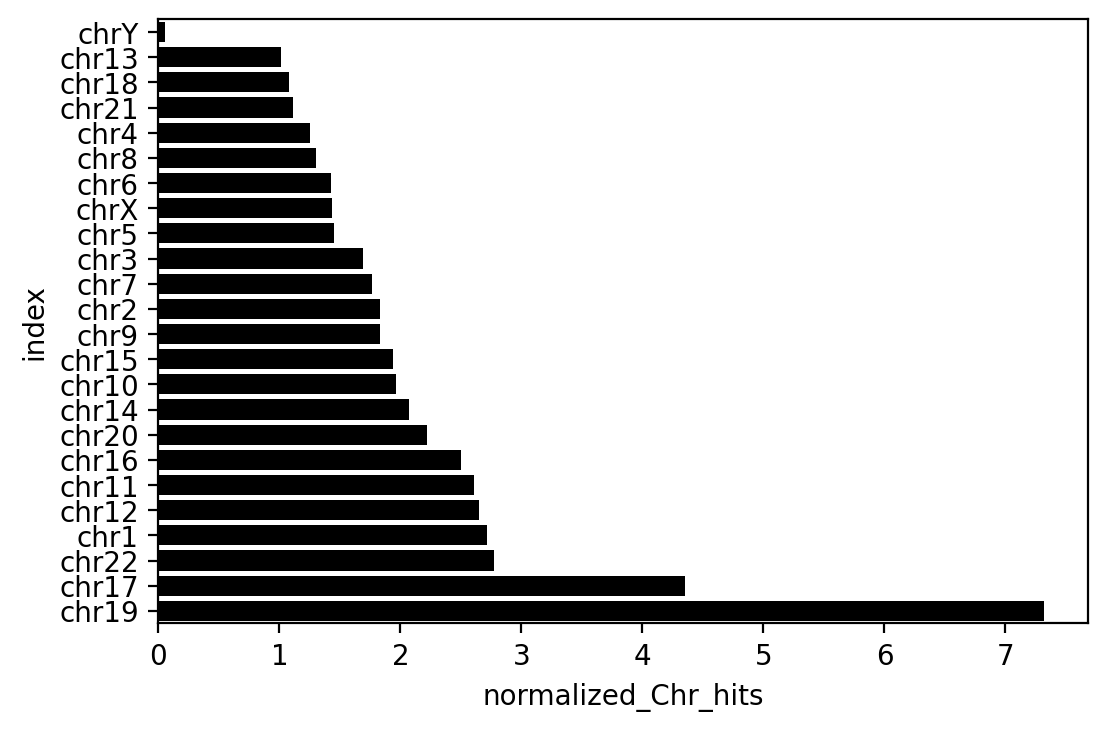

In [253]:
df1_vc = pd.DataFrame(df1.Chr.value_counts())
df1_vc['lens'] = df1_vc.index.map(chrom_lens)
#df1['Chromosome'] = df1.Chr.map(lambda x: x.replace('chr', ''))
#df1 = df1.sort_values(by='Chromosome')
#sns.histplot(data=df1, y='Chromosome')

#avg hits per 1m nucleotides per chrom
df1_vc['normalized_Chr_hits'] = df1_vc['Chr'] / df1_vc['lens'] * 1000000

df1_vc = df1_vc.reset_index().sort_values(by='normalized_Chr_hits')

plt.figure(dpi=200)
sns.barplot(data=df1_vc, y='index', x='normalized_Chr_hits', color='black')



In [ ]:
# Note: chromosome 19 has the highest ratio of genes per chromosome which may indicate why 19 is the highest. 17 also has many genes in relation to the size of the chromosome.

['SLC12A4' 'ABCC8' 'NPHP1' 'TCTN1' 'RNF157' 'CDCA5' 'LIMA1' 'NKX2-6' 'TRH'
 'USP37' 'TAF1B' 'DOCK1' 'PTPRB' 'SNU13' 'EFCAB13' 'BHLHE41' 'TNFRSF21'
 'ALOXE3' 'HDAC3' 'BCAT1' 'POLR3H' 'STAC3' 'RPGRIP1' 'IP6K3' 'USP38'
 'CALML4' 'ZNF518B' 'OR51A7' 'SH3YL1' 'RBP1' 'CABLES1' 'PPHLN1' 'ZNF701'
 'RAD52' 'BRD9' 'FGFR3' 'HIBCH' 'VDR' 'ZDHHC11B' 'SLFN12L' 'ARMC2' 'CARD8'
 'TMPRSS11A']


Text(0.5, 1.0, 'Feature Score Correlation in stopgain/startloss mutations')

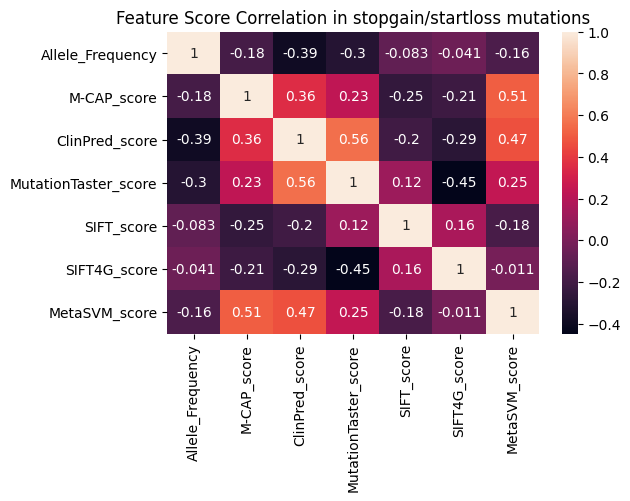

In [263]:
most_deleterious = df1_sorted[df1_sorted.Variant_Type.str.contains('loss') | df1_sorted.Variant_Type.str.contains('gain')]

summary_cols = ['Chr', 'Start', 'Ref', 'Alt', 'Gene', 'Depth','Variant_Type', 'Functional_Description', 'Allele_Frequency']
summary_cols.extend(scores)
most_deleterious = most_deleterious[summary_cols]

print(most_deleterious[summary_cols].Gene.unique())

score_corr = most_deleterious.iloc[:,-7:].astype(float).corr()

plt.figure(dpi=100)
sns.heatmap(score_corr, annot=True)
plt.title('Feature Score Correlation in stopgain/startloss mutations')
# Correlation loosely equatable to Feature overlap

In [266]:
most_deleterious[most_deleterious.Allele_Frequency == 1]
# Vitamin D receptor mutation interesting, but it occurs in exon4 and probably less concerning.
# Vitamin D's start codon is unknown as there are a few candidates but this is VERY unlikley to be it as exons 1-3 are the promotor region and proposed start of transcription

,Chr,Start,Ref,Alt,Gene,Depth,Variant_Type,Functional_Description,Allele_Frequency,M-CAP_score,ClinPred_score,MutationTaster_score,SIFT_score,SIFT4G_score,MetaSVM_score
5740,chr2,242800,T,C,SH3YL1,10,startloss,"SH3YL1:NM_001282682:exon6:c.A1G:p.M1?,SH3YL1:NM_001282687:exon6:c.A1G:p.M1?,",1.0,0.025,0.025,0.000,0.0,NaN,-0.975
33972,chr12,47879112,A,G,VDR,14,startloss,"VDR:NM_001374662:exon2:c.T2C:p.M1?,VDR:NM_000376:exon3:c.T2C:p.M1?,VDR:NM_001017536:exon3:c.T152C:p.M51T,VDR:NM_001374661:exon3:c.T2C:p.M1?,VDR:NM_001017535:exon4:c.T2C:p.M1?,",1.0,NaN,0.096,0.990,0.0,0.013,-0.925


Text(0.5, 1.0, 'score ranges')

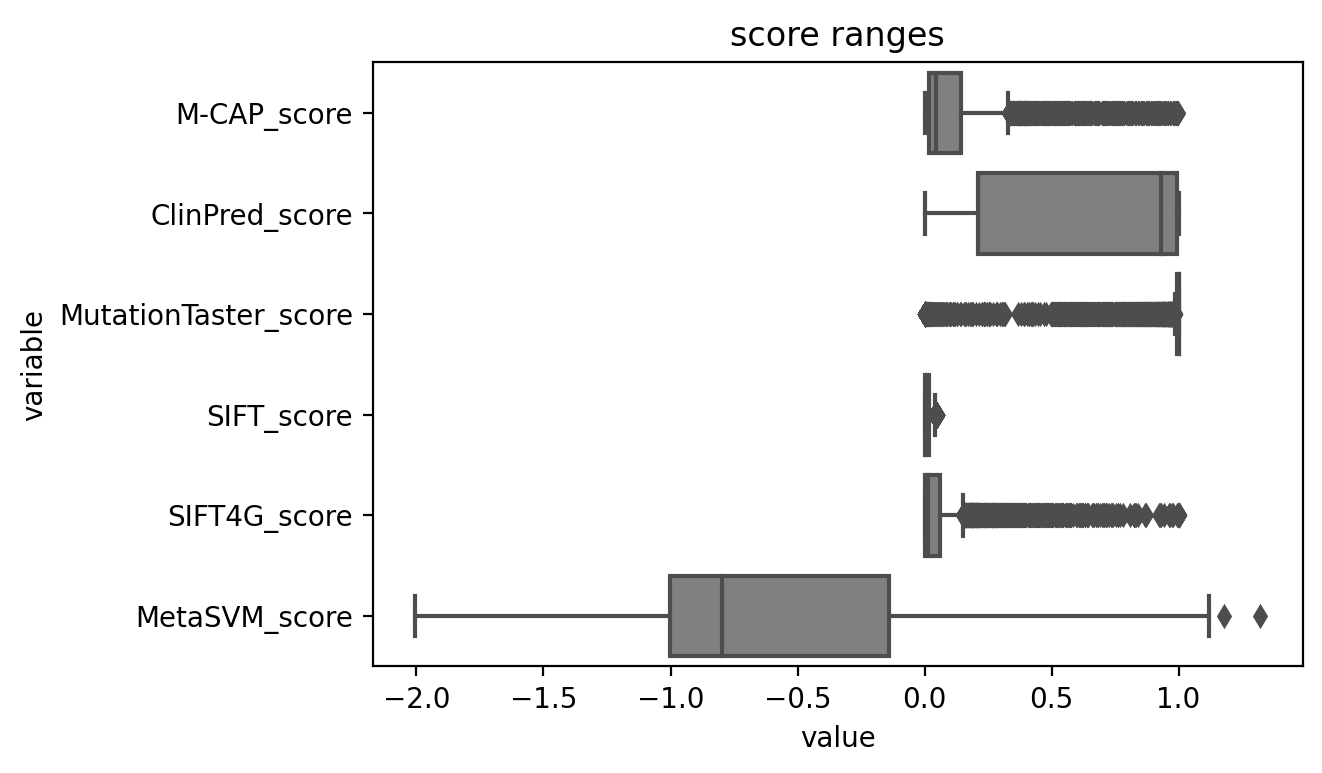

In [258]:
scores = [
    'M-CAP_score',
    'ClinPred_score',
    'MutationTaster_score',
    'SIFT_score',
    'SIFT4G_score',
    'MetaSVM_score'
]
box_scores_df = df1[scores].melt()
box_scores_df['value'] = box_scores_df['value'].astype(float)
plt.figure(dpi=200)
sns.boxplot(data=box_scores_df, x='value', y='variable', color='grey')
plt.title('score ranges')



(6097, 16)
['GBP3' 'ZNF221' 'ADGRF2' 'VDR' 'ZDHHC12' 'RC3H2' 'OR1L4' 'MS4A14' 'RSRP1'
 'USP37' 'DNAH17' 'NOL9' 'EPSTI1' 'OR10H5' 'OR51I1' 'ATRX' 'ZNF778' 'HSF1'
 'MYH15' 'CAPN8']


,Chr,Start,Ref,Alt,Gene,Depth,Variant_Type,Functional_Description,Allele_Frequency,M-CAP_score,ClinPred_score,MutationTaster_score,SIFT_score,SIFT4G_score,MetaSVM_score,score_aggr
2439,chr1,89013380,G,A,GBP3,23,nonsynonymous SNV,"GBP3:NM_001319180:exon6:c.C271T:p.R91W,GBP3:NM_001319181:exon6:c.C673T:p.R225W,GBP3:NM_018284:exon6:c.C673T:p.R225W,GBP3:NM_001319179:exon7:c.C436T:p.R146W,",1.0,NaN,0.113,1.000,0.008,0.001,0.418,3.522
49971,chr19,43966268,T,C,ZNF221,63,nonsynonymous SNV,"ZNF221:NM_001297588:exon5:c.T766C:p.C256R,ZNF221:NM_001297589:exon5:c.T766C:p.C256R,ZNF221:NM_013359:exon6:c.T766C:p.C256R,",1.0,NaN,0.139,1.000,0.015,0.0,-0.919,3.124
18839,chr6,47656503,A,G,ADGRF2,11,nonsynonymous SNV,"ADGRF2:NM_001368115:exon1:c.A17G:p.Y6C,",1.0,NaN,0.101,1,0.0,NaN,-1.054,3.101
33972,chr12,47879112,A,G,VDR,14,startloss,"VDR:NM_001374662:exon2:c.T2C:p.M1?,VDR:NM_000376:exon3:c.T2C:p.M1?,VDR:NM_001017536:exon3:c.T152C:p.M51T,VDR:NM_001374661:exon3:c.T2C:p.M1?,VDR:NM_001017535:exon4:c.T2C:p.M1?,",1.0,NaN,0.096,0.990,0.0,0.013,-0.925,3.073
26510,chr9,128721272,T,A,ZDHHC12,49,nonsynonymous SNV,"ZDHHC12:NM_001318015:exon5:c.A878T:p.N293I,ZDHHC12:NM_001318016:exon5:c.A741T:p.Q247H,ZDHHC12:NM_001318023:exon5:c.A710T:p.N237I,ZDHHC12:NM_032799:exon5:c.A713T:p.N238I,",1.0,NaN,0.056,1.000,0.0,0.0,-0.755,3.056
26277,chr9,122875192,A,T,RC3H2,27,nonsynonymous SNV,"RC3H2:NM_001354486:exon10:c.T1502A:p.V501E,",1.0,NaN,0.050,1,0.0,NaN,-1.052,3.050
26269,chr9,122724689,G,A,OR1L4,11,nonsynonymous SNV,"OR1L4:NM_001005235:exon1:c.G700A:p.G234R,",1.0,NaN,0.092,1.000,0.013,0.032,-0.903,3.047
31037,chr11,60415497,A,T,MS4A14,31,nonsynonymous SNV,"MS4A14:NM_001079692:exon4:c.A478T:p.N160Y,MS4A14:NM_001261827:exon5:c.A577T:p.N193Y,MS4A14:NM_032597:exon5:c.A529T:p.N177Y,MS4A14:NM_001261828:exon6:c.A628T:p.N210Y,",1.0,NaN,0.055,1,0.0,0.01,-0.952,3.045
1044,chr1,25246493,T,G,RSRP1,51,nonsynonymous SNV,"RSRP1:NM_001321772:exon2:c.A471C:p.R157S,RSRP1:NM_020317:exon2:c.A471C:p.R157S,",1.0,NaN,0.046,1.000,0.0,0.004,-0.583,3.042
9167,chr2,218454934,A,G,USP37,28,nonsynonymous SNV,"USP37:NM_020935:exon26:c.T2936C:p.L979S,",1.0,NaN,0.042,1,0.0,0.0,-0.982,3.042


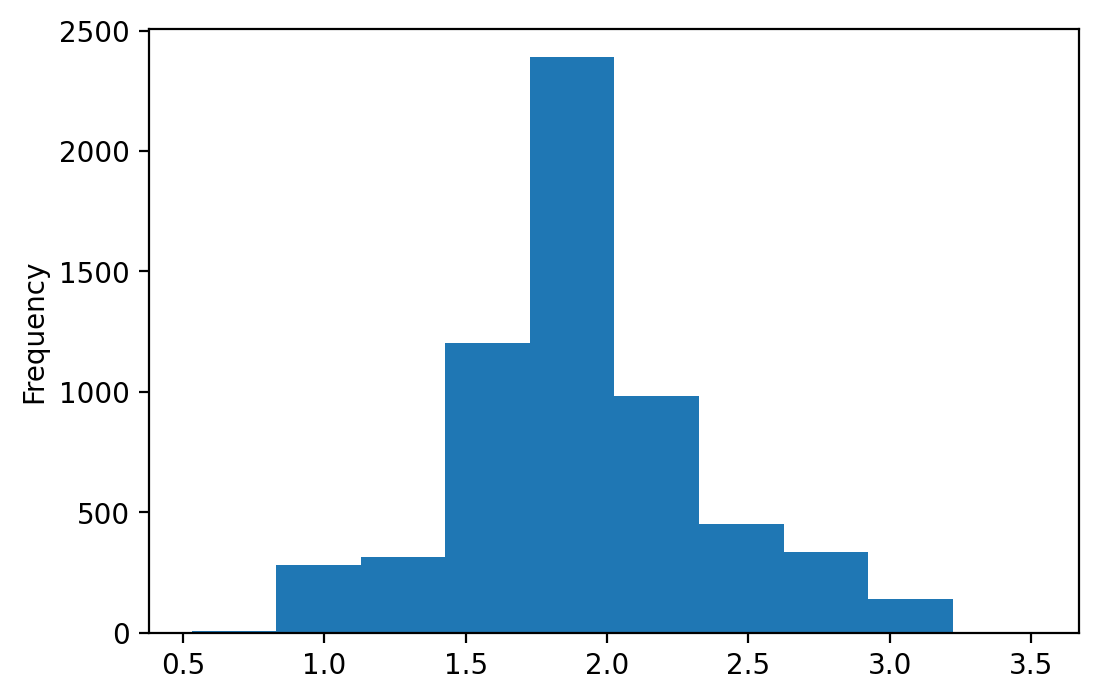

In [267]:
df1['score_aggr'] = (
    df1[scores[0]].fillna(0).astype(float) +
    df1[scores[1]].fillna(0).astype(float) +
    df1[scores[2]].fillna(0).astype(float) +
    (1 - df1[scores[3]].fillna(0).astype(float)) +
    (1 - df1[scores[4]].fillna(0).astype(float)) +
    (df1[scores[5]].fillna(0).astype(float).map(lambda x: 0 if x < 0 else x)) 
) * df1['Allele_Frequency']

df1_summary_sort_aggr = df1.sort_values(by='score_aggr', ascending=False)[summary_cols + ['score_aggr']]

plt.figure(dpi=200)
df1_summary_sort_aggr.score_aggr.plot.hist()
print(df1_summary_sort_aggr.shape)
print(df1_summary_sort_aggr.head(20).Gene.unique())
df1_summary_sort_aggr.head(20)

In [260]:
df1.sort_values(by='score_aggr', ascending=False)[[i for i in df1.columns if '_pred' in i]]

,SIFT_pred,SIFT4G_pred,LRT_pred,MutationTaster_pred,MutationAssessor_pred,FATHMM_pred,PROVEAN_pred,MetaSVM_pred,MetaLR_pred,MetaRNN_pred,M-CAP_pred,PrimateAI_pred,DEOGEN2_pred,BayesDel_addAF_pred,BayesDel_noAF_pred,ClinPred_pred,LIST-S2_pred,Aloft_pred,fathmm-MKL_coding_pred,fathmm-XF_coding_pred
2439,D,D,N,P,H,T,D,D,D,T,NaN,T,T,T,T,T,D,.;,D,NaN
49971,D,D,NaN,P,H,D,D,T,T,T,NaN,T,T,T,T,T,T,.;.;.;.;,N,N
18839,D,NaN,N,P,NaN,T,N,T,T,T,NaN,NaN,T,T,T,T,T,.;,N,N
33972,D,D,D,P,NaN,D,N,T,T,T,NaN,T,T,T,D,T,D,.;.;.;.;.;.;.;,D,N
26510,D,D,D,D,M,T,D,T,T,T,NaN,T,T,T,T,T,D,.;.;,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25156,D,T,N,P,L,T,D,T,T,T,NaN,T,T,T,T,T,D,.;.;,D,D
4096,D,T,N,P,M,T,N,T,T,T,NaN,T,T,T,T,T,D,.;.;.;,D,D
380,D,T,D,P,L,D,D,T,T,T,NaN,T,D,T,T,T,T,.;.;,D,D
44344,D,T,NaN,P,NaN,T,N,T,T,T,NaN,NaN,T,T,T,T,D,.;,N,N


In [268]:
df1_summary_sort_aggr[df1_summary_sort_aggr.Variant_Type.str.contains('gain')]

,Chr,Start,Ref,Alt,Gene,Depth,Variant_Type,Functional_Description,Allele_Frequency,M-CAP_score,ClinPred_score,MutationTaster_score,SIFT_score,SIFT4G_score,MetaSVM_score,score_aggr
33065,chr12,916443,G,A,RAD52,18,stopgain,"RAD52:NM_001297421:exon7:c.C535T:p.Q179X,RAD52:NM_001297419:exon9:c.C766T:p.Q256X,RAD52:NM_134424:exon9:c.C766T:p.Q256X,",0.5,NaN,0.967,1,0.0,0.035,-0.954,1.9660
15396,chr5,891287,C,A,BRD9,22,stopgain,"BRD9:NM_001375861:exon3:c.G268T:p.E90X,BRD9:NM_001375862:exon3:c.G268T:p.E90X,BRD9:NM_001375863:exon3:c.G268T:p.E90X,BRD9:NM_001375877:exon3:c.G268T:p.E90X,BRD9:NM_001375878:exon3:c.G268T:p.E90X,BRD9:NM_001375879:exon3:c.G268T:p.E90X,BRD9:NM_023924:exon3:c.G268T:p.E90X,",0.5,NaN,0.947,1,0.007,0.01,-0.444,1.9650
33912,chr12,42375074,A,T,PPHLN1,16,stopgain,"PPHLN1:NM_001143787:exon4:c.A346T:p.K116X,PPHLN1:NM_001364824:exon4:c.A346T:p.K116X,PPHLN1:NM_001364823:exon5:c.A367T:p.K123X,PPHLN1:NM_001364833:exon5:c.A511T:p.K171X,PPHLN1:NM_016488:exon5:c.A511T:p.K171X,PPHLN1:NM_201438:exon5:c.A367T:p.K123X,PPHLN1:NM_201439:exon5:c.A511T:p.K171X,PPHLN1:NM_201440:exon5:c.A367T:p.K123X,PPHLN1:NM_201515:exon6:c.A532T:p.K178X,",0.5,0.014,0.983,1,0.031,0.172,-0.466,1.8970
13217,chr4,1807246,G,A,FGFR3,16,stopgain,"FGFR3:NM_001354810:exon17:c.G2337A:p.W779X,",0.5,NaN,0.742,0.999,0.013,0.167,-1.046,1.7805
50375,chr19,48234449,A,T,CARD8,16,stopgain,"CARD8:NM_001351787:exon4:c.T30A:p.C10X,CARD8:NM_001351791:exon4:c.T30A:p.C10X,CARD8:NM_001365950:exon4:c.T30A:p.C10X,CARD8:NM_001351784:exon5:c.T30A:p.C10X,CARD8:NM_001351792:exon5:c.T30A:p.C10X,CARD8:NM_001351790:exon6:c.T102A:p.C34X,",0.5,NaN,0.005,0.000,0.0,0.0,-0.928,1.0025


['a', 'a', 'a', 'e', 'e', 'e', 'o', 'o', 'o', 'u', 'u', 'u']

In [2]:
from Bio.Align import PairwiseAligner
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Replace 'sequence' with your actual gene sequence
sequence = SeqIO.read('misc_data/NM_004006.3_human_DMD_Dp427m.fasta', 'fasta').seq.__str__()

def needleman_wunsch(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-1):
    """
    Implement the Needleman-Wunsch algorithm for global sequence alignment.
    Returns the alignment score matrix.
    """
    # Initialize the score matrix
    m, n = len(seq1), len(seq2)
    score_matrix = [[0 for _ in range(n+1)] for _ in range(m+1)]

    # Fill the first row and first column with gap penalties
    for i in range(1, m+1):
        score_matrix[i][0] = gap_penalty * i
    for j in range(1, n+1):
        score_matrix[0][j] = gap_penalty * j

    # Fill the rest of the matrix
    for i in tqdm(range(1, m+1)):
        for j in range(1, n+1):
            match = score_matrix[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score_matrix[i-1][j] + gap_penalty
            insert = score_matrix[i][j-1] + gap_penalty
            score_matrix[i][j] = max(match, delete, insert)

    return score_matrix

# Example usage with a test sequence
alignment_matrix = needleman_wunsch(sequence, sequence)



100%|██████████| 13992/13992 [01:36<00:00, 144.84it/s]


In [4]:
import pandas as pd
pd.DataFrame(alignment_matrix).to_csv('DMD_self_alignment.csv')

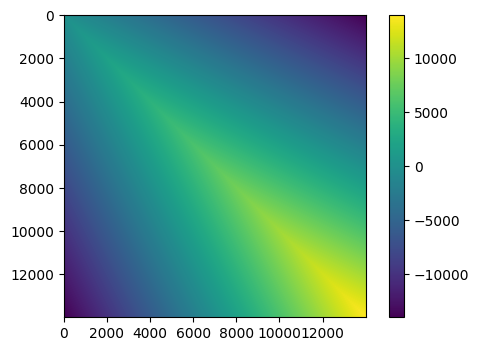

In [6]:
fig, ax = plt.subplots(dpi=100)
cax = ax.imshow(np.matrix(alignment_matrix), interpolation='nearest', rasterized=True)
fig.colorbar(cax)
plt.show()